# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](https://drive.google.com/file/d/1-iXooLjNuEXU41dqz8ORQ5JEZPHd9x0X/view?usp=sharing).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

The dataset is [here](https://drive.google.com/file/d/1MRhRtdX8QuPPEhelBIS_FEl5vJjRLSeE/view?usp=sharing). Please download it and place it in the data folder.<br>
First, import the basic libraries and the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [4]:
#drop column + keep df in place
df.drop('Id', axis=1, inplace=True)

You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of what your output  should look like is [here](https://drive.google.com/file/d/1cuq6qhFZC5wavm-_STcxktBKdAc4xvH8/view?usp=sharing)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [5]:
missing_value_df = pd.DataFrame({'column': df.columns,
                                 'percent_missing': df.isnull().sum() * 100 / len(df)})

more_20_missing = missing_value_df[missing_value_df['percent_missing'] > 20]
more_20_missing

,column,percent_missing
Alley,Alley,93.767123
FireplaceQu,FireplaceQu,47.260274
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [6]:
#drop 5 columns + keep df in place
df.drop(more_20_missing['column'], axis=1, inplace=True)

In [7]:
df.shape

(1460, 75)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

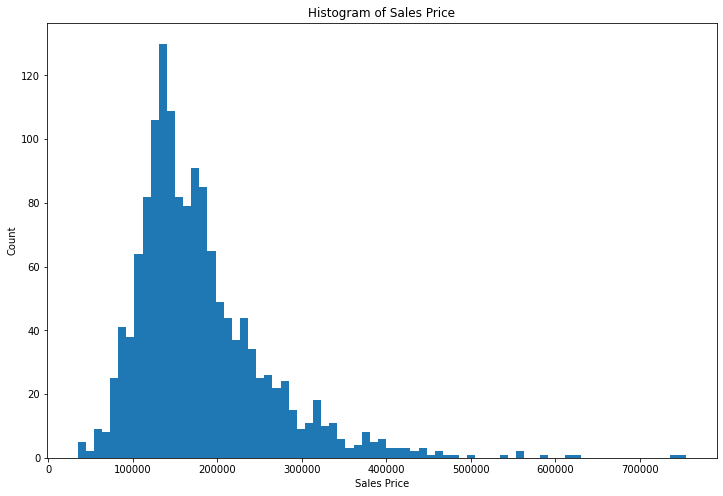

In [20]:
plt.figure(figsize=(12,8))
plt.hist(df['SalePrice'], bins = 75)
plt.title('Histogram of Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Count')
plt.show()

In [9]:
#distibution is not normal, because the tail to the right is much longer than the one on left (bounded by zero)

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

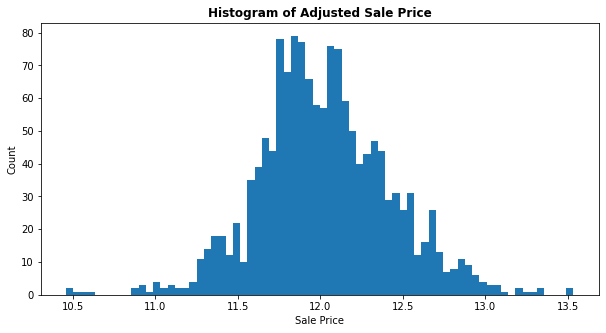

In [21]:
#

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

Text(0, 0.5, 'SalePrice')

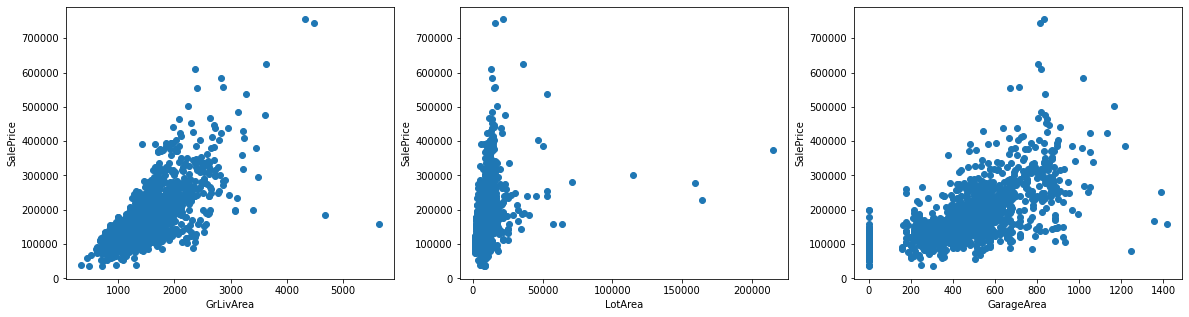

In [25]:
#Size of the house

# Plot
f, ax = plt.subplots(1, 3, figsize=(20,5))

ax[0].scatter(df['GrLivArea'], df['SalePrice'])
ax[1].scatter(df['LotArea'], df['SalePrice'])
ax[2].scatter(df['GarageArea'], df['SalePrice'])
ax[0].set_xlabel('GrLivArea')
ax[1].set_xlabel('LotArea')
ax[2].set_xlabel('GarageArea')
ax[0].set_ylabel('SalePrice')
ax[1].set_ylabel('SalePrice')
ax[2].set_ylabel('SalePrice')

In [ ]:
#There is clear linear relationship between SalePrice and GrLivArea 
#There seems to be a linear relationship between SalePrice and GarageArea (of course there are also houses with no garage
#Lot Area is not correlated with SalesPrice

In [54]:
#Number of rooms

# Total rooms
df['TotalRooms'] = df['FullBath'] + df['BsmtFullBath'] + df['BedroomAbvGr'] + df['KitchenAbvGr'] + 0.5*df['HalfBath'] + 0.5*df['BsmtHalfBath']

# check how often certain amount of rooms appear
df['TotalRooms'].value_counts()

6.0     297
5.0     231
6.5     217
7.5     148
7.0     143
4.0     131
5.5     113
8.0      47
8.5      47
4.5      35
9.0      15
10.0     10
3.0       8
9.5       6
3.5       5
11.0      2
10.5      2
2.5       1
12.0      1
12.5      1
Name: TotalRooms, dtype: int64

In [ ]:
# we see that houses with less than 4 rooms or more than 8,5 rooms are rare

In [ ]:
# Let's check the total rooms vs the average sales price of rooms
room_price_mean = df[['SalePrice','TotalRooms']].groupby(['TotalRooms']).mean()
room_price_mean

Text(0, 0.5, 'SalePrice')

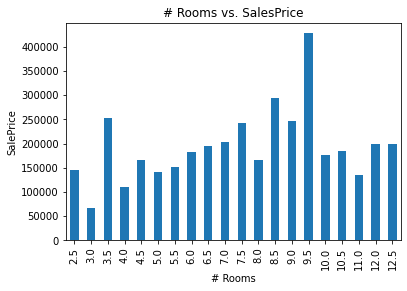

In [57]:
room_price_mean.plot(kind='bar', legend = None)
plt.title('# Rooms vs. SalesPrice')
plt.xlabel('# Rooms')
plt.ylabel('SalePrice')

# We must ignore below 4 and above 8,5
# Price seems to be increasing with number of rooms (4 - 8,5), only 8 stays low

Text(0, 0.5, 'SalePrice')

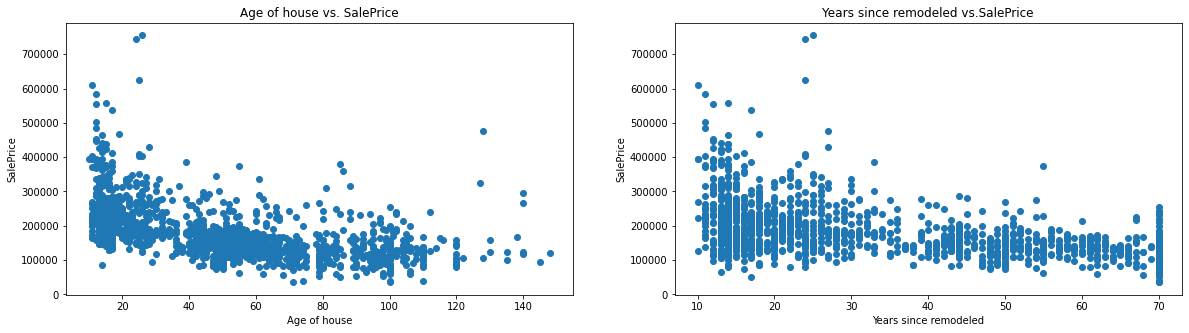

In [59]:
#Year built or remodeled

#age of house
df['house_age'] = 2020 - df['YearBuilt']

#years since remodeling
df['years_remodeled'] = 2020 - df['YearRemodAdd']

#plot
f, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].scatter(df['house_age'], df['SalePrice'])
ax[1].scatter(df['years_remodeled'], df['SalePrice'])
ax[0].set_title('Age of house vs. SalePrice')
ax[1].set_title('Years since remodeled vs.SalePrice')
ax[0].set_xlabel('Age of house')
ax[1].set_xlabel('Years since remodeled')                
ax[0].set_ylabel('SalePrice')
ax[1].set_ylabel('SalePrice')

In [ ]:
#There seems to be correlations between both SalePrice and Age of house and Years since remodeled.

In [61]:
# Neighbourhood

# Let's check the neighbourhood vs the average sales price of rooms
neighbourhood = df[['SalePrice','Neighborhood']].groupby(['Neighborhood']).mean()
neighbourhood

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000
Gilbert,192854.506329


In [62]:
# check how often certain neighbourhoods appear
df['Neighborhood'].value_counts()

#Blueste, NPkVill, Veenker are all rare in dataset

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

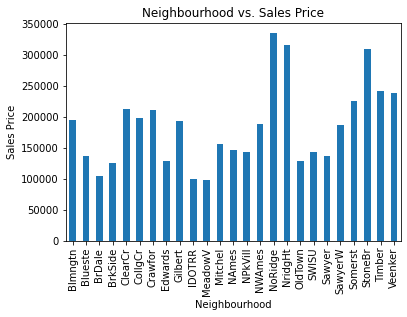

In [64]:
# Plot

neighbourhood.plot(kind='bar', legend = None)

plt.title('Neighbourhood vs. Sales Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Sales Price')
plt.show()

# Certain neigbourhoods indeed seem to be higher priced, but we need to correct for size as well. I can imagine that 
# certain neighbourhoods have bigger houses

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like this [example](https://drive.google.com/file/d/1JhdNvbAnnWDFXEtDoBtx3B2KKIkqsnSH/view?usp=sharing)

In [74]:
# Correlation
corr = df.corr()
corr['SalePrice'].sort_values(ascending=False).nlargest(10)

SalePrice            1.000000
SalePriceAdjusted    0.948374
OverallQual          0.790982
GrLivArea            0.708624
GarageCars           0.640409
TotalBathrooms       0.631731
GarageArea           0.623431
TotalBsmtSF          0.613581
1stFlrSF             0.605852
FullBath             0.560664
Name: SalePrice, dtype: float64

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [72]:
corr['SalePrice'].sort_values(ascending=False).nsmallest(5)

house_age         -0.522897
years_remodeled   -0.507101
KitchenAbvGr      -0.135907
EnclosedPorch     -0.128578
MSSubClass        -0.084284
Name: SalePrice, dtype: float64

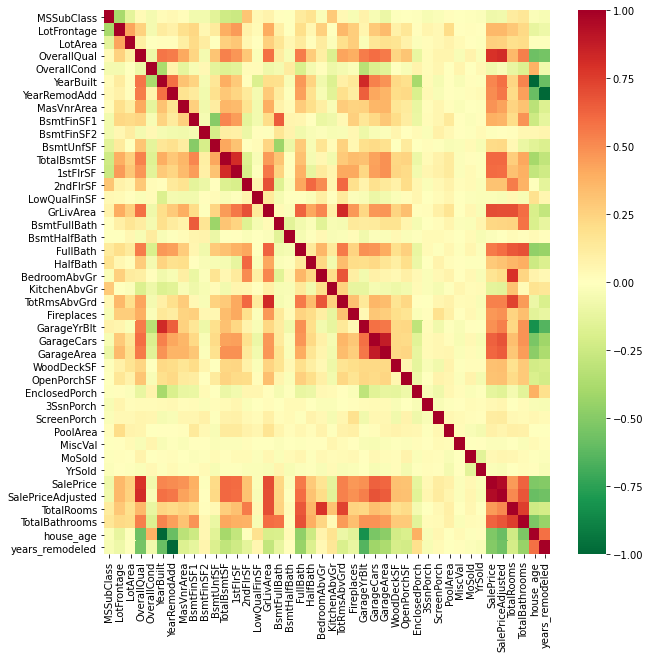

In [71]:
# Plot
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap = "RdYlGn_r")
plt.show()

In [13]:
# Overall Quality (Overall material and finish quality) is positevely correlated with 0.79
# Gr Live Area (Above grade (ground) living area square feet) is positevely correlated with 0.71
# GarageCars (Size of garage in car capacity) is positevely correlated with 0.64

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

*OverAll Quality is most important factor for sales price.   
Quality of material and finish. Correlation of 0.8 with sales price. See heatmap

*GrLivArea & Garage area. Size of house has effect on sales price   
In the scatterplot the positive linear relations can be found (see above) + in heatmap you can see correlations. 

*Total Bathrooms: number of bathrooms in the house affects sales price   
Heatmap shows high correlation  

*Garage Cars: the car capacity of garage has high positive relation with salesprice.   
Heatmap show high correlation. First four are logical, this one is least expected I would say